<a href="https://colab.research.google.com/github/john-decker/john-decker-Arts-and-Humanities-Programming-CoLab-Work/blob/main/Lecture5_Data_Wrangling_Part_1_Reading_from_and_Writing_to_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Files
Thus far, we’ve worked with variables, controls, data structures, and functions. This is great but we have two related issues. The first is that everytime we want to work with data, we have to enter it by hand (think of our dictionaries and lists or the poem we used to learn string operations) and once we’ve made changes to it in our program, we have no stable place to store it (we have to re-run our program to get the results we’ve already computed). We can help address these issues by employing files. 

In computing, a file is “a contiguous set of bytes used to store data.” In contemporary use, the basic structure of a file includes a header with metadata about the file (e.g. its size, format, file name, authorship information), the data contained in the file, and an End of File (EOF) character. The type of data contained in the file is usually made clear by its extension. There are various file types but some of the most common you’ll encounter early in your programming career are .txt, .csv, tsv, and .json.

**Be aware:** 
Text files, which includes .csv, .tsv, and .json, have encodings. The simplest encoding is ASCII (American Standard Code for Information Interchange). This encoding schema can hold 128 values that include the standard English alphabet (upper and lower case), digits from 0-9 as well as certain control characters (such as the carriage return and the new line). In most contemporary computing environments, the standard encoding is UTF-8 (Unicode Transformation Format - 8bit). This approach totals almost 145,000 characters. In addition to all of the ASCII characters, UTF-8 also accommodates a variety of alphabets and symbols such as: Eastern European alphabets, Hindi characters, Chinese, Japanese, and Korean characters, mathematical symbols, and emojis. UTF-16 (which is not commonly used, at least yet) is capable of representing over 1 million individual characters. 

**Take note:** 
In some instances, it will be either beneficial or required to specify the encoding you want to use to write a file or that you expect a file you are opening to be.

###Accessing Files
A file system uses directories, folders, and files. A directory is like a filing cabinet – it is a container that holds multiple folders. A folder is normally kept in a directory and is able to hold multiple files. A file is normally kept in a folder (though it can reside by itself in a directory) and is an individual document containing some type of data. With that out of the way, let’s say that you have a file named “favorite_hobbies.txt” and you need to locate it in the following file structure:

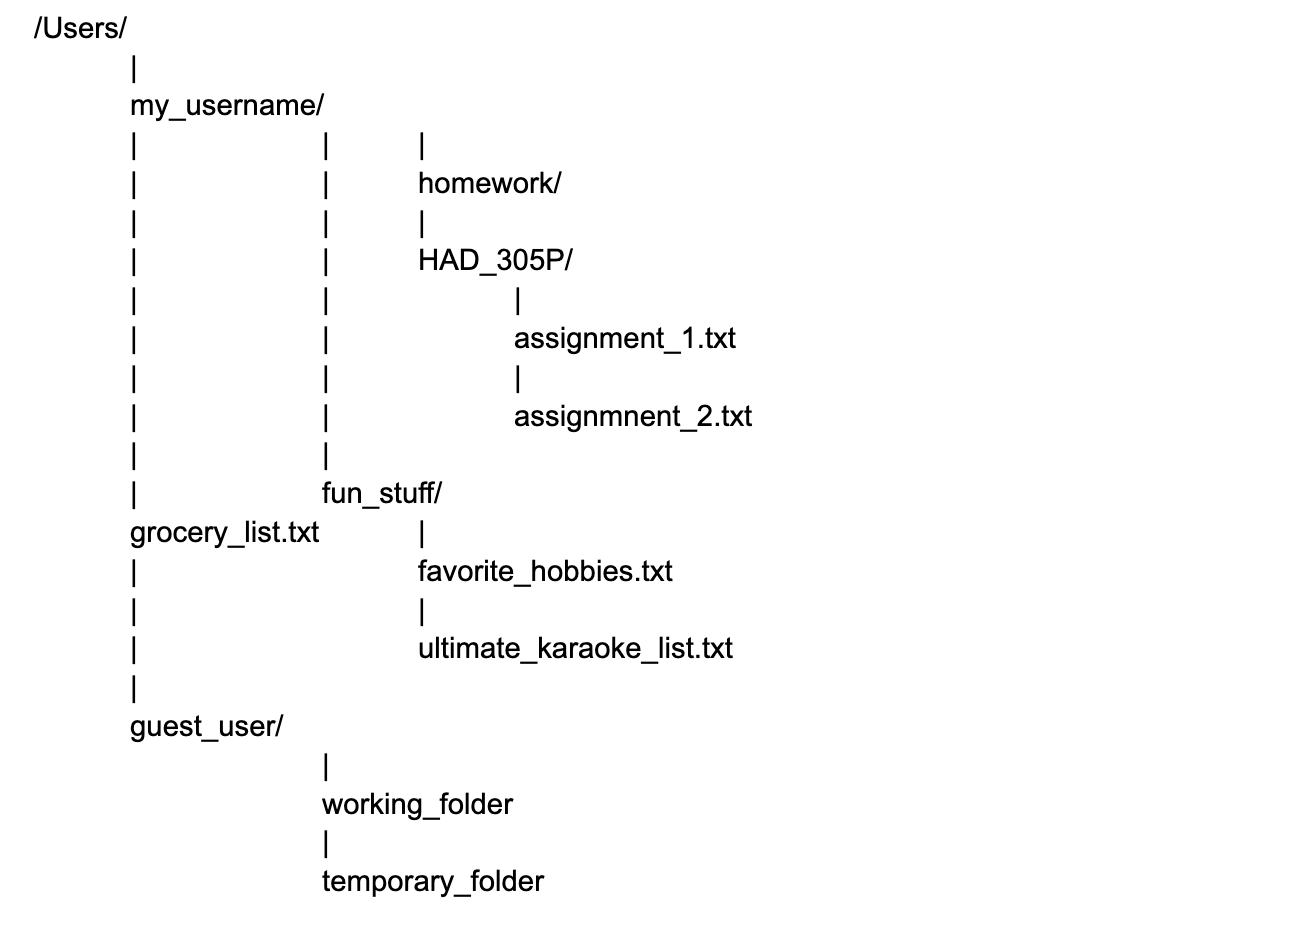

If we are in the same folder as the file we can use a relative path, our path looks like this:

> ```file_path = ‘favorite_hobbies.txt’```

If we are not in the same file and need the "absolute" path, it looks like this:

> ```file_path = ‘/Users/my_username/fun_stuff/favorite_hobbies.txt’```

Be aware that there is a difference in convention between Unix/Linux environments (like Macs) and Windows environments. Unix/Linux machines use the forward slash (“/”) and Windows machines use the backward slash (“\”). Fortunately, Python allows you to use the forward slash even when working in a Windows environment (behind the scenes, however, Python is using the native configuration). The other difference is that in Unix/Linux environments, the full path begins with “/” which means “root”. Windows environments prefix the path with a drive name (e.g. C, D, E). The full path for a Windows machine (using Python) might look something like this:

> ```file_path = ‘C:/Users/my_username/fun_stuff/favorite_hobbies.txt’```

If you need or want to write the path using Windows notation, you will need to use a “raw” string designator so that the backslashes, which are special characters usually used to escape items in a string, can be used. A configuration for this might look something like:

> ```file_path = r'C:\Users\my_username\fun_stuff\favorite_hobbies.txt'```

While it is common to place Python scripts and files in the same folder and use the relative path, using the absolute path is usually a reliable way to ensure that your program will find the file you are referencing.

**Pro-tip:** 
If you want to know for certain what file your program is in (what is called your current working directory or “cwd”), you can use Python’s os library to help you find it. 




In [ ]:
# Use getcwd() to determine current working directory. NOTE: best use is in IDEs or Command Line
import os
my_cwd = os.getcwd()
print(my_cwd)

**Note:** 
The inputting of file paths and finding files applies to working with files outside a CoLab notebook (i.e. in an IDE or the Command Line). CoLab handles file access differently. Knowing how file strucutures work in other situations, however, is good information to have.

**For CoLab**
Use the built-in file loading system and then copy the path to the object so that you can use it in your filepath designator. If you do not copy the path, and try to input it yourself, you might get the following error:

> ```FileNotFoundError: [Errno 2] No such file or directory:```

**Remember**
The file you load into CoLab will be _temporary_ and will need to be reloded when you re-establish (or restart) your runtime.

In [ ]:
#open simple text file
test_path = "/content/text_test.txt"
with open (test_path, 'r') as file_obj:
  text_data = file_obj.read()
print(text_data)

###With Open
The ```with open``` syntax instructs the Python interpreter to open a "file handler" object. The benefit of using this approach (as opposed to others you may find) is that you do not have to manually close the file when you are done reading it.

**Be aware:** 
The file we are working with is tiny (it is one line), which means it takes up very little space in memory. If you are trying to open a file that equals or exceeds the amount of memory your local computer has, your program will fail and may require you to reset your computer. 

In [ ]:
#use readline with limits to get preview of first n characters
new_file_path = "/content/longer_text.txt"
with open(new_file_path, 'r') as file_obj:
   print( file_obj.readline(7))

In [ ]:
#use readline to get specific chunks of the file (in this case, entire lines)
with open(new_file_path, 'r') as file_obj:
   for increment in range(0,4):
       print( file_obj.readline())

In [ ]:
#use readlines to return each line of text as a list for greater memory efficiency
with open(new_file_path, 'r') as file_obj:
   for line in file_obj.readlines():
       print(line, end = '')

**Alert:** The differences between the .readline(), the .readlines(), and the .read() methods are subtle but important. The .readine() method reads the number of characters passed as an argument. The .readlines() method returns a list containing each line in the file. As a result, if we wish to read the text in a “normal” format, we must iterate over the list and output each line. The .read() method will return the entire file in a file object, which can use an immense amount of memory depending on the size of the file. We can use .read() in a manner similar to .readline() if we pass an integer value to the method.

####Try it yourself:
Use the .read() method on our text and pass a variety of integers into the method. See what you get as your output.

In [ ]:
#use read() method
with open(new_file_path, 'r') as file_obj:
   reader = file_obj.read()
print(reader) 

###Writing Basic Files
Reading files is only half of the battle, we also need a way to write files so that we can store our output in a more durable manner. Fortunately, we can use the “with open” approach. When we opened a file, we used “with open” then in parentheses specified a file path and told the method to open in read mode by using ‘r’. When we write, we do the same thing but we specify which mode to write in; we have a few options:

|Write Flag|Function|||Considerations|           
|:---  |:---             ||  |:---                 |
|x     |write blank file ||  |possibly unnecessary |
|w     |write to file    ||  |can overwrite data   |
|a     |append to file   ||  |adds text w/o destroying old data|


In [ ]:
#write file (may need to refresh CoLab files after running block)
write_file_path = 'test_write_file.txt'
with open(write_file_path, 'w') as write_obj:
    for i in range(1,31): #remember range stops one before the stated end point
        write_obj.write(f'This is line {i}\n')

**Thought exercise:** BEFORE you run the code, what do you think this code block will write as output?

In [ ]:
#open file just written
with open(write_file_path, 'r') as file_obj:
    print(file_obj.read())

Let's say that we now want to add more to our previous file and we try the following alteration to our code:

In [ ]:
#try to add more lines to file
with open(write_file_path, 'w') as write_obj:
    for i in range(31,51): #remember range stops one before the stated end point
        write_obj.write(f'This is line {i}\n')

**Thought exercise:** BEFORE you run the code, what do you think this code block will write as output?

In [ ]:
#read file just written
with open(write_file_path, 'r') as file_obj:
    print(file_obj.read())

Let's see how we might come at this a different way.

In [ ]:
#recreate first attempt
write_file_path2 = 'test_append_file.txt'
with open(write_file_path2, 'a') as write_obj: #notice the use of 'a' for append mode
    for i in range(1,31): #remember range stops one before the stated end point
        write_obj.write(f'This is line {i}\n')

In [ ]:
#open file just written
with open(write_file_path2, 'r') as file_obj:
    print(file_obj.read())

We've recreated our original output, let's take a look at how we can add to it.

In [ ]:
#try to add to file using a different approach
with open(write_file_path2, 'a') as write_obj:
    for i in range(31,51): #remember range stops one before the stated end point
        write_obj.write(f'This is line {i}\n')

####Try it yourself:
Use the .write() method to write Imtiaz Dharker’s poem “A Century Later”, which we used in our lecture on data types, to a file. Be sure to use your already formatted version.  

In [ ]:
#write previous data to a file for storage
long_string_formatted = "The school-bell is a call to battle,\nevery step to class, a step into the firing-line.\nHere is the target, fine skin at the temple,\ncheek still rounded from being fifteen.\n\nSurrendered, surrounded, she\ntakes the bullet in the head\n\nand walks on. The missile cuts\na pathway in her mind, to an orchard\rin full bloom, a field humming under the sun,\nits lap open and full of poppies.\n\nThis girl has won\nthe right to be ordinary,\n\nwear bangles to a wedding, paint her fingernails,\ngo to school. Bullet, she says, you are stupid.\nYou have failed. You cannot kill a book\nor the buzzing in it.\n\nA murmur, a swarm. Behind her, one by one,\nthe schoolgirls are standing up\nto take their places on the front line."

write_file_path_3 = 'example_file.txt'
with open(write_file_path_3, 'a') as write_obj:
  write_obj.write(long_string_formatted)

In [ ]:
#open file just written
with open(write_file_path_3, 'r') as file_obj:
    print(file_obj.read())

**Side note:**

Python allows you to open a file in both read and write mode (‘r+’) or write and read mode (‘w+’). This can be helpful if you need to read something from a file and then write back to it while the file is still open. For example, let’s say that we have a file that we want to read and then write the reverse of each line at the end of the document (why we would want to do this, I don’t know) we could do the following:


In [ ]:
#read file and then write back to the same file
example_file_path = '/content/example_file.txt'
with open(example_file_path, 'r+') as read_write_obj:
    incoming_text = read_write_obj.readlines()
    for item in incoming_text:
        read_write_obj.write(item[::-1]) 

In [ ]:
#open file just written to
with open(example_file_path, 'r') as file_obj:
    print(file_obj.read())

As with reading files, Python gives us more than one option for writing. In addition to .write(), we can also use the .writelines() method. We’ll use one of our grocery lists from our data structures lecture.

In [ ]:
#previous data to write out
grocery_list_confused = ['kale', 'coffee', 'quinoa', 'sweet potatoes', 'pinto beans', 'coffee', 'zucchini', 'sweet potatoes', 'coffee', 'kale']

In [ ]:
#write list data with new lines
file_path_3 = "groceries.txt"

with open(file_path_3, 'w') as write_obj:
    write_obj.writelines('\n'.join(grocery_list_confused))

**Notice** that we do not have to use a for loop on a simple list because the .writelines() method handles the iteration for us.

**Alert:** the .writelines() method requires that we handle placing a newline between our list items if we want them on separate lines (as opposed to on the same line). To do this, we specify the newline character in a string (with escape character) and then use a method we have not yet seen. We use the .join() method, which joins the elements in an iterable (like a list) into a single string. It must be joined to a string (in this case, the newline character).

###Reading .csv Files
We have seen how to read and write basic text files. Now, let’s work on opening .csv files. The letters in csv stand for “comma separated values”. In this file structure, elements are separated by commas (e.g. “John”, “Smith”, “42”, “Actor”). A .csv file is arranged into columns (or fields) and rows. Each column represents a particular category of information (e.g. “First Name”, “Last Name”, “Age”, “Occupation”). Each row is an instance of those categories. In the examples we have been using so far, the structure would be:

|First Name |Last Name|Age |Occupation |
|:---       |:---     |:---|:---       |
|John       |Smith    |42. |Actor      |

The top portion (with the category designations) is the “header”. Each instance after that is a “record”.

**Be aware:** The table here is for demonstration purposes so that the relationship between the header and the row is easy to read. The actual file will be rows of comma separated values, which can be difficult for humans to read efficiently without visual aids like the table.


In [ ]:
#read a simple csv file
import csv

csv_file_path = '/content/person_simple.csv'

with open(csv_file_path, 'r') as csv_object:
    reader = csv.reader(csv_object, delimiter = ',')
    for row in reader:
        print(row)

**Be aware:** the comma delimiter will be activated for any comma it finds. For the most part, if a comma occurs in a field or column (e.g. Actor, Baristo), the .csv parser will not break a the comma as long as the information is enclosed in quotes (e.g. “Actor, Baristo” not Actor, Baristo).

**Note:** the .tsv format (tab separated value) can be opened using the csv module. Instead of putting a ‘,’ as the delimiter value, you will use the tab character between quote marks – ‘\t’.


In [ ]:
#read csv data without headers
with open(csv_file_path, 'r') as csv_object:
    reader = csv.reader(csv_object, delimiter = ',')
    next(reader, None)  # skip the headers
    for row in reader:
        print(row)

['John', 'Smith', '42', 'Actor']
['Jane', 'Doe', '31', 'Architect']
['Zoe', 'Hurst', '20', 'Student']
['Ben', 'Granger', '50', 'Teacher']
['Shawna', 'Miller', '38', 'Dentist']
['Gretchen', 'Weiss', '80', 'Retired']


In [ ]:
#access individual elements
with open(csv_file_path, 'r') as csv_object:
    reader = csv.reader(csv_object, delimiter = ',')
    for row in reader:
        print(row[1])

last_name
Smith
Doe
Hurst
Granger
Miller
Weiss


In [ ]:
#put information into a list for later use
last_names = []
with open(csv_file_path, 'r') as csv_object:
    reader = csv.reader(csv_object, delimiter = ',') #skip header
    next(reader, None)  # skip the headers
    for row in reader:
        last_names.append(row[1])

print(last_names)

['Smith', 'Doe', 'Hurst', 'Granger', 'Miller', 'Weiss']


Accessing elements by index works well. Python also gives us another way to access elements through the DictReader.

In [ ]:
#use DictReader() to read in csv
with open(csv_file_path, 'r') as csv_object:
    reader = csv.DictReader(csv_object)
    for row in reader:
        print(row)

OrderedDict([('first_name', 'John'), ('last_name', 'Smith'), ('age', '42'), ('occupation', 'Actor')])
OrderedDict([('first_name', 'Jane'), ('last_name', 'Doe'), ('age', '31'), ('occupation', 'Architect')])
OrderedDict([('first_name', 'Zoe'), ('last_name', 'Hurst'), ('age', '20'), ('occupation', 'Student')])
OrderedDict([('first_name', 'Ben'), ('last_name', 'Granger'), ('age', '50'), ('occupation', 'Teacher')])
OrderedDict([('first_name', 'Shawna'), ('last_name', 'Miller'), ('age', '38'), ('occupation', 'Dentist')])
OrderedDict([('first_name', 'Gretchen'), ('last_name', 'Weiss'), ('age', '80'), ('occupation', 'Retired')])


In [ ]:
#access particular element
with open(csv_file_path, 'r') as csv_object:
    reader = csv.DictReader(csv_object)
    for row in reader:
        print(row["last_name"])

Smith
Doe
Hurst
Granger
Miller
Weiss


**Be aware:** the DictReader is **not** the same as a dictionary in Python. The .keys() and .values() methods work somewhat but not in the same way as they do with regular dictionaries. In addition, the keys are assigned using header data. If no header is available, it will be necessary to pass an additional argument called “fieldnames”, which should provide the information that a header would.

###Writing .csv Files
As with text files, opening a .csv is only half of the task. We also need to be able to write to them as well. Fortunately, the csv module has a .write() method that takes the date we are inputting and turns it into a delimited string. Let’s say that we want to write a new file that keeps track of our favorite pre 1990s Scifi movies. The categories we choose as our column headers are: name, genre, release date, run time (we could add more but these will do for this example). Let’s begin by creating lists with the data we want to write–we’ll start with our header information (i.e. our column names) and then create one entry for each movie (i.e. our rows).


In [ ]:
#prepare data to be written to csv file
my_headers = ['name', 'genre', 'release_date', 'run_time']

sf_movie_1 = ['The Day the Earth Stood Still', 'Science Fiction', '1951', '92 minutes']
sf_movie_2 = ['Planet of the Apes', 'Science Fiction', '1968', '112 minutes']
sf_movie_3 = ['Logan\'s Run', 'Science Fiction', '1976', '120 minutes']
sf_movie_4 = ['Alien', 'Science Fiction', '1979', ' 117 minutes']
sf_movie_5 = ['The Empire Strikes Back', 'Science Fiction', '1980', '124 minutes']
sf_movie_6 = ['Blade Runner', 'Science Fiction', '1982', '110 minutes']

In [ ]:
#write individual rows to csv
csv_write_path = 'sci_fi_movies.csv'
with open(csv_write_path, 'w', newline = '') as write_object:
    writer = csv.writer(write_object)
    writer.writerow(my_headers)
    writer.writerow(sf_movie_1)
    writer.writerow(sf_movie_2)
    writer.writerow(sf_movie_3)
    writer.writerow(sf_movie_4)
    writer.writerow(sf_movie_5)
    writer.writerow(sf_movie_6)

**Be aware:** this approach, and those that follow, will also work for .tsv documents. Simply remove the “newline” parameter from the “with open” method and include a “delimiter” statement when initializing the reader object:

> ```with open(specific_file_path, 'w') as write_object:```<br/>
>>```writer = csv.writer(write_object, delimiter = '\t')``` 


In [ ]:
#prepare a list of lists
horror_movies = [
['name', 'genre', 'release_date', 'run_time'],
['The House on Haunted Hill', 'Horror', '1959', '75 minutes'],
['Night of the Living Dead', 'Horror', '1968', '96 minutes'],
['The Omega Man', 'Horror', '1971', ' 98 minutes'],
['The Wicker Man', 'Horror', '1973', '88 minutes'],
['The Exorcist', 'Horror', '1973', '110 minutes'],
['Halloween', 'Horror', '1978', '132 minutes']
]

In [ ]:
#use writerows method
# import csv

csv_write_path_2 = "horror_movies.csv"

with open(csv_write_path_2, 'w', newline = '') as write_object:
    writer = csv.writer(write_object)
    writer.writerows(horror_movies)


In [ ]:
#read previously written csv data
with open(csv_write_path_2, 'r') as file_object:
    reader = csv.reader(file_object, delimiter = ',')
    for row in reader:
        print(row)

**Be aware:** it is not always necessary to specify a delimiter when opening the file. For example, both of our movie .csv files open fine without it. It is a good idea, however, to specify a delimiter  to help avoid errors.

In [ ]:
#prep data to use dictionary writer
movie_1 = {'name':'Planet of the Apes', 'genre':'Science Fiction', 'release_date':'1968', 'run_time':'112 minutes'}
movie_2 = {'name':'Night of the Living Dead', 'genre':'Horror', 'release_date':'1968', 'run_time':'96 minutes'}
movie_3 = {'name':'Logan\'s Run', 'genre':'Science Fiction', 'release_date':'1976', 'run_time':'120 minutes'}
movie_4 = {'name':'Halloween', 'genre':'Horror', 'release_date':'1978', 'run_time':'132 minutes'}


In [ ]:
#use dictwriter method to write dictionary data to csv

csv_write_path_3 = 'movie_dict.csv'
with open(csv_write_path_3, 'w', newline='') as file_writer:
    fieldnames = ['name', 'genre', 'release_date', 'run_time']
    writer = csv.DictWriter(file_writer, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow(movie_1)
    writer.writerow(movie_2)
    writer.writerow(movie_3)
    writer.writerow(movie_4)

In [ ]:
#open previously written dict data
with open(csv_write_path_3, 'r') as file_object:
    reader = csv.reader(file_object, delimiter = ',')
    for row in reader:
        print(row)

['name', 'genre', 'release_date', 'run_time']
['Planet of the Apes', 'Science Fiction', '1968', '112 minutes']
['Night of the Living Dead', 'Horror', '1968', '96 minutes']
["Logan's Run", 'Science Fiction', '1976', '120 minutes']
['Halloween', 'Horror', '1978', '132 minutes']


**Notice** that what the read operation prints out is a series of lists representing our header and rows. It does not print a dictionary.

####Try it yourself
Put the individual dictionaries from the example into a list called “mixed_movies” and see if you can write it using the .writelines() method.

In [ ]:
#data to write out
mixed_movies = [
{'name':'Planet of the Apes', 'genre':'Science Fiction', 'release_date':'1968', 'run_time':'112 minutes'},
{'name':'Night of the Living Dead', 'genre':'Horror', 'release_date':'1968', 'run_time':'96 minutes'},
{'name':'Logan\'s Run', 'genre':'Science Fiction', 'release_date':'1976', 'run_time':'120 minutes'},
{'name':'Halloween', 'genre':'Horror', 'release_date':'1978', 'run_time':'132 minutes'}
]

In [ ]:
#writing a list of dictionaries

csv_write_path_4 = 'mixed_movies.csv'

with open(csv_write_path_4, 'w', newline='') as file_writer:
	fieldnames = ['name', 'genre', 'release_date', 'run_time']
	writer = csv.DictWriter(file_writer, fieldnames=fieldnames)

	writer.writeheader()
	writer.writerows(mixed_movies)

In [ ]:
#open and read dict data
with open(csv_write_path_3, 'r') as file_object:
    reader = csv.reader(file_object, delimiter = ',')
    for row in reader:
        print(row)

['name', 'genre', 'release_date', 'run_time']
['Planet of the Apes', 'Science Fiction', '1968', '112 minutes']
['Night of the Living Dead', 'Horror', '1968', '96 minutes']
["Logan's Run", 'Science Fiction', '1976', '120 minutes']
['Halloween', 'Horror', '1978', '132 minutes']


###Reading .json Files
Another common file format that you will encounter is .json, which stands for Java Script Object Notation. As its name makes clear, this approach was originally developed for the Java Script language to make handling data easier across websites. It has long since moved away from being solely for the web (though it is still used there) and is used in various computing situations. Unlike .csv or .tsv, in which data are organized according to headings (i.e. columns and rows), json organizes data using a structure similar to a Python dictionary. As a result, json can be a much more effective and efficient way of writing dictionary data to files (as opposed to converting them to .csv files and reconverting them to dictionaries in your program). 

The json module allows us to write json-compatible files in two ways. One is a string writer and the other is a file writer. We will begin with the string writer. In the thought exercise about whether or not the csv.DictWriter() method would allow us to write a list of dictionaries using the .writelines() method, it was suggested that we create a list of dictionaries containing the movies we wanted to write. What if we had a copy of that list in a json format? How might we open it? Let’s assume we have such a json-compatible list and its name is “movie_json”. We can access it by using the .loads() method. The ‘s’ in .loads() stands for “string”. 

In [ ]:
#read json data
import json

movie_json = json.dumps(mixed_movies, indent=2)
print(movie_json)

[
  {
    "name": "Planet of the Apes",
    "genre": "Science Fiction",
    "release_date": "1968",
    "run_time": "112 minutes"
  },
  {
    "name": "Night of the Living Dead",
    "genre": "Horror",
    "release_date": "1968",
    "run_time": "96 minutes"
  },
  {
    "name": "Logan's Run",
    "genre": "Science Fiction",
    "release_date": "1976",
    "run_time": "120 minutes"
  },
  {
    "name": "Halloween",
    "genre": "Horror",
    "release_date": "1978",
    "run_time": "132 minutes"
  }
]


Because it is formatted with key/value pairs, we can access elements in this json string as we could any dictionary. 

In [ ]:
#access specific parts of the dictionary data
movie_dict = json.loads(movie_json)
for movie in movie_dict:
    print(f'{movie["name"]}: {movie["release_date"]}')

Planet of the Apes: 1968
Night of the Living Dead: 1968
Logan's Run: 1976
Halloween: 1978


A similar process is used for reading a json file from a hard drive or other memory location outside the program.

In [ ]:
#get json data from a file
file_path_states = '/content/states_list.json'

with open(file_path_states, 'r') as file_object:
    data = json.load(file_object)
    print(data)


{'states': [{'name': 'Alabama', 'abbreviation': 'AL'}, {'name': 'Alaska', 'abbreviation': 'AK'}, {'name': 'Arizona', 'abbreviation': 'AZ'}, {'name': 'Arkansas', 'abbreviation': 'AR'}, {'name': 'California', 'abbreviation': 'CA'}, {'name': 'Colorado', 'abbreviation': 'CO'}, {'name': 'Connecticut', 'abbreviation': 'CT'}, {'name': 'Delaware', 'abbreviation': 'DE'}, {'name': 'Florida', 'abbreviation': 'FL'}, {'name': 'Georgia', 'abbreviation': 'GA'}, {'name': 'Hawaii', 'abbreviation': 'HI'}, {'name': 'Idaho', 'abbreviation': 'ID'}, {'name': 'Illinois', 'abbreviation': 'IL'}, {'name': 'Indiana', 'abbreviation': 'IN'}, {'name': 'Iowa', 'abbreviation': 'IA'}, {'name': 'Kansas', 'abbreviation': 'KS'}, {'name': 'Kentucky', 'abbreviation': 'KY'}, {'name': 'Louisiana', 'abbreviation': 'LA'}, {'name': 'Maine', 'abbreviation': 'ME'}, {'name': 'Maryland', 'abbreviation': 'MD'}, {'name': 'Massachusetts', 'abbreviation': 'MA'}, {'name': 'Michigan', 'abbreviation': 'MI'}, {'name': 'Minnesota', 'abbrevi

In [ ]:
#print formatted information
for state in data['states']: #this the top-level key for the following information
    print(f'{state["name"]}: {state["abbreviation"]}')

Alabama: AL
Alaska: AK
Arizona: AZ
Arkansas: AR
California: CA
Colorado: CO
Connecticut: CT
Delaware: DE
Florida: FL
Georgia: GA
Hawaii: HI
Idaho: ID
Illinois: IL
Indiana: IN
Iowa: IA
Kansas: KS
Kentucky: KY
Louisiana: LA
Maine: ME
Maryland: MD
Massachusetts: MA
Michigan: MI
Minnesota: MN
Mississippi: MS
Missouri: MO
Montana: MT
Nebraska: NE
Nevada: NV
New Hampshire: NH
New Jersey: NJ
New Mexico: NM
New York: NY
North Carolina: NC
North Dakota: ND
Ohio: OH
Oklahoma: OK
Oregon: OR
Pennsylvania: PA
Rhode Island: RI
South Carolina: SC
South Dakota: SD
Tennessee: TN
Texas: TX
Utah: UT
Vermont: VT
Virginia: VA
Washington: WA
West Virginia: WV
Wisconsin: WI
Wyoming: WY


In [ ]:
#use conditional to get specific data
for state in data['states']:
    if state["name"][0] == 'K' or state["name"][0] == 'M':
        print(f'{state["name"]}: {state["abbreviation"]}')

Kansas: KS
Kentucky: KY
Maine: ME
Maryland: MD
Massachusetts: MA
Michigan: MI
Minnesota: MN
Mississippi: MS
Missouri: MO
Montana: MT


###Writing .json Files
Writing files to the json format is not much harder than it is reading from it. To illustrate how to write with json, let’s convert the good_v_evil dictionary we used in the data structures lecture. We can take the dictionary, which already exists as a string, and convert it to a json format by using the json.dumps() method. Like the loads() method, the  ‘s’ in “dumps” stands for “string”. 


In [ ]:
#list of dictionaries to write out as .json data
good_v_evil = [{'member_1': {'name': 'Ben Kanobi',
   'occupation': 'Retired General',
   'likes': ['convincing authorities to look the other way',
    'building lightsabers',
    'fighting evil'],
   'goals': 'undo past mistakes'},
  'member_2': {'name': 'Luke Skywalker',
   'occupation': 'Moisture Farmer',
   'likes': ['going into town', 'working on droids', 'driving a land speeder'],
   'goals': 'getting off the farm'},
  'member_3': {'name': 'C3P0',
   'occupation': 'Protocol Droid',
   'likes': ['order and stability', 'hot oil baths for squeaky joints'],
   'goals': 'keeping R2 from getting into trouble'},
  'member_4': {'name': 'R2D2',
   'occupation': 'Astromech Droid',
   'likes': ['getting into trouble', 'hacking into Imperial computers'],
   'goals': 'bringing help to the princess'},
  'member_5': {'name': 'Han Solo',
   'occupation': 'Smuggler',
   'likes': ['danger and adventure',
    'making money',
    'flying through asteroid fields'],
   'goals': 'keeping one step ahead of the Empire'},
  'member_6': {'name': 'Chewbacca',
   'occupation': 'Smuggler',
   'likes': ['holo chess', 'sleeping in a hammock', 'warm tropical beaches'],
   'goals': 'keeping the Millennium Falcon flying'}},
 {'member_1': {'name': 'Darth Vader',
   'occupation': 'Sith Lord',
   'likes': ['choking people with the force',
    'crushing rebellions',
    'flying TIE fighters'],
   'goals': 'get revenge, so much revenge'},
  'member_2': {'name': 'Emperor Palpatine',
   'occupation': 'Despot',
   'likes': ['luring people to the dark side',
    'ruling the empire with force',
    'building death stars'],
   'goals': 'control everything and everyone'},
  'member_3': {'name': 'Wilhuff Tarkin',
   'occupation': 'Commander of the Death Star',
   'likes': 'order and discipline',
   'goals': 'destroy the rebels'},
  'member_4': {'name': 'Boba Fett',
   'occupation': 'Bounty Hunter',
   'likes': 'the hunt',
   'goals': 'become a legend'},
  'member_5': {'name': 'Jabba the Hut',
   'occupation': 'Crime Boss',
   'likes': ['money',
    'throwing enemies in the Rancor Pit',
    'rigging Pod races'],
   'goals': 'build a criminal empire'}}]

In [ ]:
#show data in .json format
import json
star_wars_dict = json.dumps(good_v_evil, indent=2)
print(star_wars_dict)

In [ ]:
#write data to a file in .json format
file_path_5 = 'good_v_evil.json'

with open(file_path_5, 'w') as json_write:
    json.dump(good_v_evil, json_write, indent=2)

In [ ]:
#reading data and accessing keys and values
file_path_6 = '/content/good_v_evil.json'
with open(file_path_6, 'r') as incoming_file:
  data = json.load(incoming_file)
  for member_data in data:
    for key, value in member_data.items():
      print(key, value)

member_1 {'name': 'Ben Kanobi', 'occupation': 'Retired General', 'likes': ['convincing authorities to look the other way', 'building lightsabers', 'fighting evil'], 'goals': 'undo past mistakes'}
member_2 {'name': 'Luke Skywalker', 'occupation': 'Moisture Farmer', 'likes': ['going into town', 'working on droids', 'driving a land speeder'], 'goals': 'getting off the farm'}
member_3 {'name': 'C3P0', 'occupation': 'Protocol Droid', 'likes': ['order and stability', 'hot oil baths for squeaky joints'], 'goals': 'keeping R2 from getting into trouble'}
member_4 {'name': 'R2D2', 'occupation': 'Astromech Droid', 'likes': ['getting into trouble', 'hacking into Imperial computers'], 'goals': 'bringing help to the princess'}
member_5 {'name': 'Han Solo', 'occupation': 'Smuggler', 'likes': ['danger and adventure', 'making money', 'flying through asteroid fields'], 'goals': 'keeping one step ahead of the Empire'}
member_6 {'name': 'Chewbacca', 'occupation': 'Smuggler', 'likes': ['holo chess', 'sleep

In [ ]:
#accessing just values
for member_data in data:
    for value in member_data.values():
        print(value)

{'name': 'Ben Kanobi', 'occupation': 'Retired General', 'likes': ['convincing authorities to look the other way', 'building lightsabers', 'fighting evil'], 'goals': 'undo past mistakes'}
{'name': 'Luke Skywalker', 'occupation': 'Moisture Farmer', 'likes': ['going into town', 'working on droids', 'driving a land speeder'], 'goals': 'getting off the farm'}
{'name': 'C3P0', 'occupation': 'Protocol Droid', 'likes': ['order and stability', 'hot oil baths for squeaky joints'], 'goals': 'keeping R2 from getting into trouble'}
{'name': 'R2D2', 'occupation': 'Astromech Droid', 'likes': ['getting into trouble', 'hacking into Imperial computers'], 'goals': 'bringing help to the princess'}
{'name': 'Han Solo', 'occupation': 'Smuggler', 'likes': ['danger and adventure', 'making money', 'flying through asteroid fields'], 'goals': 'keeping one step ahead of the Empire'}
{'name': 'Chewbacca', 'occupation': 'Smuggler', 'likes': ['holo chess', 'sleeping in a hammock', 'warm tropical beaches'], 'goals': 

In [ ]:
#access specific parts of the data
for member_data in data:
    for key, value in member_data.items():
        print (f'{value["name"]}: {value["occupation"]}')

Ben Kanobi: Retired General
Luke Skywalker: Moisture Farmer
C3P0: Protocol Droid
R2D2: Astromech Droid
Han Solo: Smuggler
Chewbacca: Smuggler
Darth Vader: Sith Lord
Emperor Palpatine: Despot
Wilhuff Tarkin: Commander of the Death Star
Boba Fett: Bounty Hunter
Jabba the Hut: Crime Boss


####Try it yourself:
Use the dictionary you created for Homework 3C and write it as a json document to your computer. Verify that it has written properly (by dragging it into a browser) and then open it with Python and access some values.